In [84]:
# Name : Ravali Kondreddi
# E-mail : kondreddi.ravali@gmail.com
DIR='/Users/ravali/Desktop'
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv(DIR+'/data1.csv', delimiter=',',low_memory=False)
#display(df)
df=df.dropna()
display(df)
print(df.dtypes)

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
5,1005,1,2017-01-01 10:08:05,338.00,0
6,1006,1,2017-01-01 15:42:57,1526.43,1
7,1007,0,2017-01-01 15:59:50,168.00,0
8,1008,0,2017-01-01 18:01:04,207.99,0
9,1009,1,2017-01-01 19:27:17,283.00,1


customer_id           int64
gender                int64
date                 object
value               float64
predicted_gender      int64
dtype: object


In [95]:
df_sample=df.sort_values('customer_id')
print(df_sample.head(n=10))# sorted by customer_id

      customer_id  gender                 date  value  predicted_gender
0            1000       0  2017-01-01 00:11:31  198.5                 1
1            1001       0  2017-01-01 00:29:56  338.0                 1
2            1002       1  2017-01-01 01:30:31  733.0                 1
1742         1002       1  2017-02-19 21:35:31  176.0                 1
928          1002       1  2017-01-23 04:33:38  148.6                 1
3            1003       1  2017-01-01 01:34:22  772.0                 1
676          1003       1  2017-01-20 05:56:10  425.5                 1
4292         1003       1  2017-04-25 09:54:54    0.0                 1
4323         1003       1  2017-04-26 02:37:20  704.0                 1
4            1004       0  2017-01-01 03:11:54  508.0                 1


In [2]:
df.groupby('gender').mean() # difference of orders for both the genders


,customer_id,value,predicted_gender
gender,,,
0,5032.640331,363.890006,0.504513
1,5034.754172,350.708361,0.782032


In [96]:
df['week'] = pd.DatetimeIndex(df['date']).week

In [14]:
df_week=df.groupby(['week']).count()['value']
display(df_week) # number of orders per week 

week
1     180
2     264
3     405
4     233
5     211
6     195
7     248
8     315
9     260
10    318
11    269
12    240
13    237
14    350
15    284
16    220
17    223
18    257
19    337
20    627
21    301
22    215
23    219
24    310
25    276
26    380
27    286
28    226
29    244
30    188
31    183
32    192
33    178
34    302
35    200
36    218
37    237
38    172
39    201
40    347
41    345
42    182
43    154
44    159
45    170
46    183
47    391
48    343
49    236
50    294
51    208
52    258
Name: value, dtype: int64

In [15]:
df_week=df_week.to_frame()

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import cufflinks as cf
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
df_week.iplot()



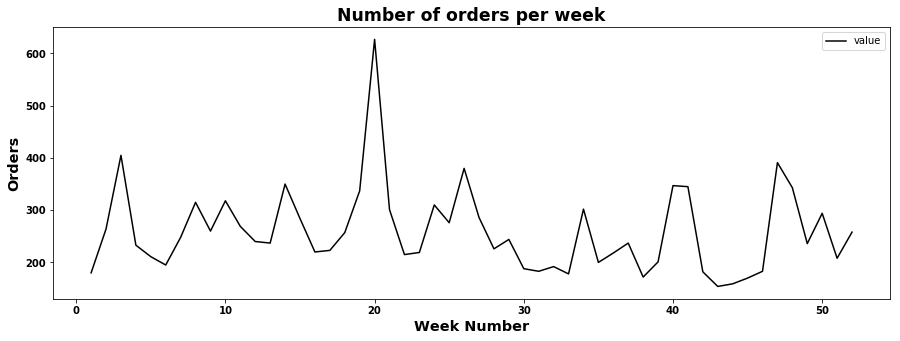

In [80]:
ax = df_week.plot(figsize = (15,5),colormap='rainbow_red')
plt.xlabel ('Week Number', fontweight = 'bold', fontsize = 'x-large')
plt.ylabel ('Orders', fontweight = 'bold', fontsize = 'x-large')
plt.xticks (fontweight = 'bold')
plt.yticks (fontweight = 'bold')
plt.title ('Number of orders per week', fontweight = 'bold', fontsize = 'xx-large')
plt.show ()


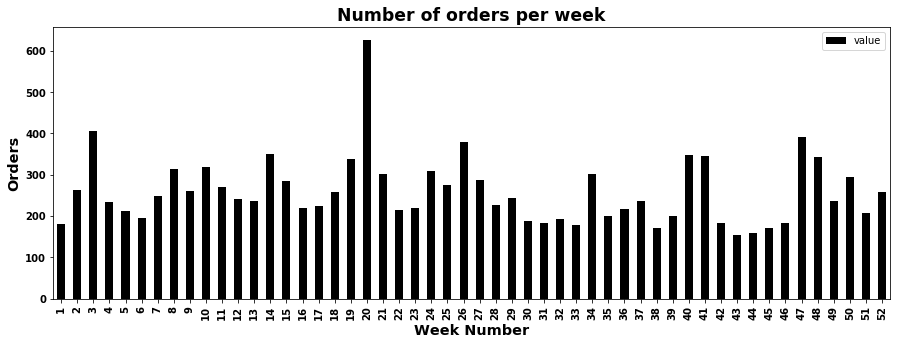

In [81]:
ax = df_week.plot(kind = 'bar',figsize = (15,5),colormap='gray')
plt.xlabel ('Week Number', fontweight = 'bold', fontsize = 'x-large')
plt.ylabel ('Orders', fontweight = 'bold', fontsize = 'x-large')
plt.xticks (fontweight = 'bold')
plt.yticks (fontweight = 'bold')
plt.title ('Number of orders per week', fontweight = 'bold', fontsize = 'xx-large')
plt.show ()

In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df.gender,df.predicted_gender)
cm = confusion_matrix(df.gender,df.predicted_gender)
print(cm)

[[3349 3410]
 [1463 5249]]


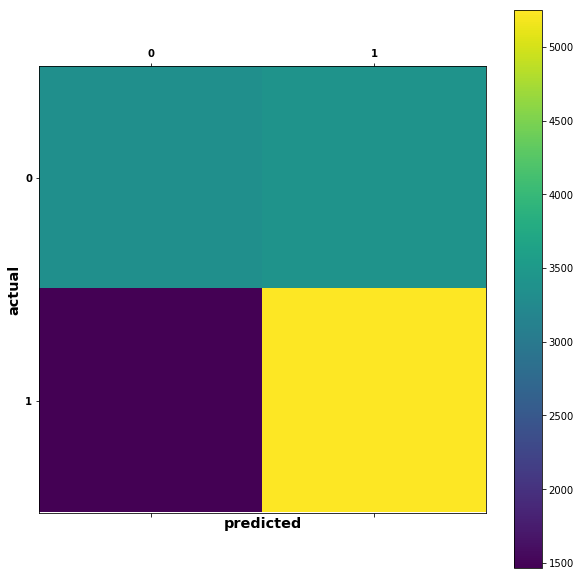

In [86]:
plt.matshow(cm)
#cm.rows.name = 'Actual'

plt.xlabel ('predicted', fontweight = 'bold', fontsize = 'x-large')
plt.ylabel ('actual', fontweight = 'bold', fontsize = 'x-large')
plt.xticks (fontweight = 'bold')
plt.yticks (fontweight = 'bold')
plt.colorbar()

In [88]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
Accuracy_score=((TP + TN) / float(TP + TN + FP + FN))
print(Accuracy_score)

0.6382599658525722


In [89]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)

0.3617400341474278


In [90]:
sensitivity = TP / float(FN + TP)

print(sensitivity)

0.7820321811680572


In [91]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)

0.504512501849386


In [92]:
precision = TP / float(TP + FP)

print(precision)

0.6061900912345537
